In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import numpy as np
import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import vstack
import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from scipy.sparse import hstack
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
df=pd.read_csv('combined_dataset.csv')

In [5]:
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www.voting-yahoo.com,10000000,0,0,0,20,0,0,1,20,2,1
1,www.zvon.org/xxl/WSDL1.1/Output/index.html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais.com/file-security-update-infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima.astro.umd.edu/nemo/linuxastro/,7001,0,0,0,35,0,0,0,18,3,0
4,huarui-tec.com/js/?us.battle.net/login/en/?ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [6]:
#checking null values
df.isnull().sum()

domain            0
ranking           0
isIp              0
valid             0
activeDuration    0
urlLen            0
is@               0
isredirect        0
haveDash          0
domainLen         0
nosOfSubdomain    0
label             0
dtype: int64

In [7]:
df.describe()

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
count,9.591000e+04,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000,95910.000000
mean,6.118618e+06,0.000229,0.573892,3747.876144,69.327442,0.002773,0.007444,0.157856,23.409061,2.387718,0.582984
std,4.835254e+06,0.015144,0.494512,3974.587188,69.740134,0.052591,0.085960,0.364608,25.426852,2.140997,0.493068
min,1.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,3.205600e+04,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,14.000000,2.000000,0.000000
50%,1.000000e+07,0.000000,1.000000,2192.000000,44.000000,0.000000,0.000000,0.000000,17.000000,2.000000,1.000000
75%,1.000000e+07,0.000000,1.000000,7670.000000,78.000000,0.000000,0.000000,0.000000,22.000000,2.000000,1.000000
max,1.000000e+07,1.000000,1.000000,15707.000000,2175.000000,1.000000,1.000000,1.000000,244.000000,34.000000,1.000000


In [11]:
#checking data types
df.dtypes

domain            object
ranking            int64
isIp               int64
valid              int64
activeDuration     int64
urlLen             int64
is@                int64
isredirect         int64
haveDash           int64
domainLen          int64
nosOfSubdomain     int64
label              int64
dtype: object

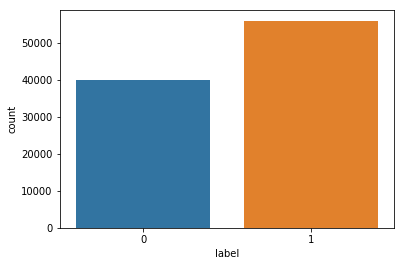

In [14]:
sns.countplot(df['label'])

In [16]:
#Data Preprocessing
#removing special characters from domain and convert characters into small letters
def remove_characters(row):
    chars = re.escape(string.punctuation)
    return re.sub(r'['+chars+']', ' ',row)

df['domain'] = df['domain'].apply(remove_characters)

In [18]:
df.head()

,domain,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
0,www voting yahoo com,10000000,0,0,0,20,0,0,1,20,2,1
1,www zvon org xxl WSDL1 1 Output index html,194914,0,1,7305,42,0,0,0,12,2,0
2,tecportais com file security update infonfmati...,10000000,0,0,0,155,0,0,0,14,1,1
3,bima astro umd edu nemo linuxastro,7001,0,0,0,35,0,0,0,18,3,0
4,huarui tec com js us battle net login en ref...,10000000,0,1,730,79,0,0,1,14,1,1


In [19]:
#Creating string for Wordcloud of 'domain' tokens
comment_words = '' 
stopwords = set(STOPWORDS) 
for val in df['domain']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  

In [27]:
wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='black', 
                stopwords=stopwords,
                min_font_size = 10).generate(comment_words)

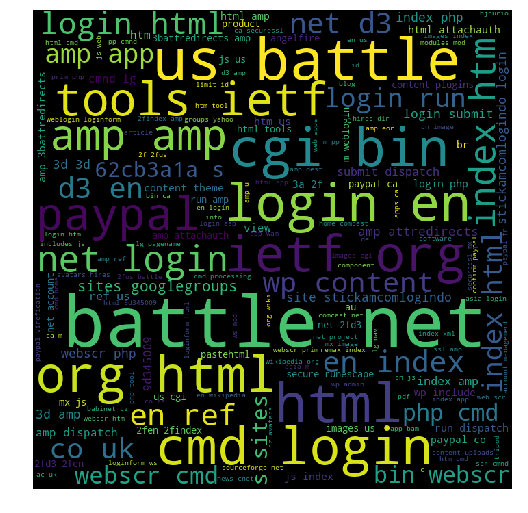

In [28]:
# plot the WordCloud image                        
plt.figure(figsize = (7, 7), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

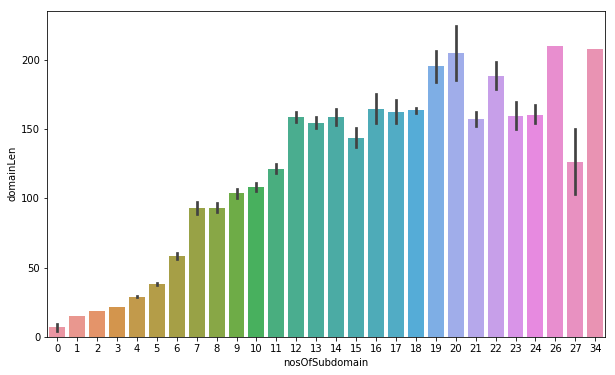

In [24]:
#bar plot to show domain length for number of domains
plt.figure(figsize=(10,6))
sns.barplot(x="nosOfSubdomain", y="domainLen", data=df)
plt.show()

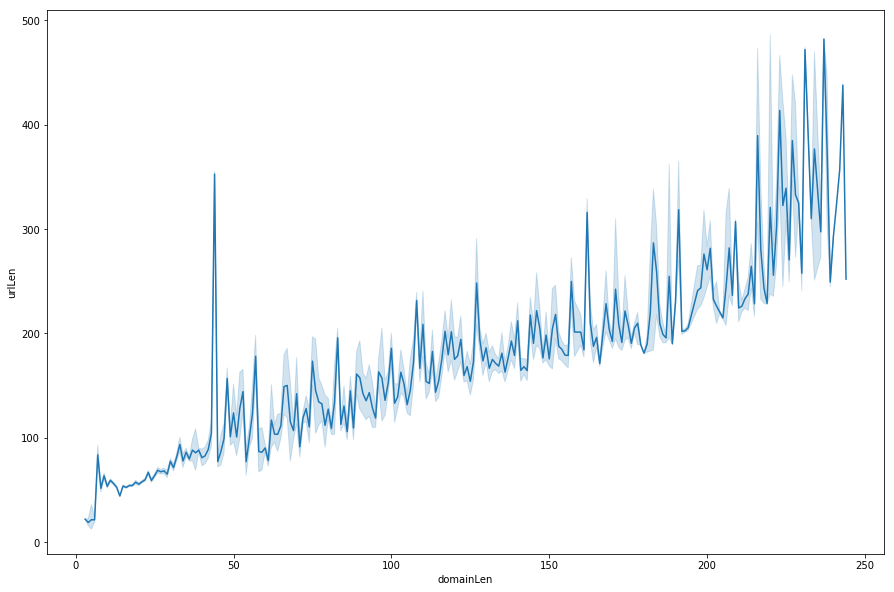

In [29]:
#line plot to show variation in url length according to domain length
plt.figure(figsize=(15,10))
sns.lineplot(y=df.urlLen,x=df.domainLen,data=df)
plt.show()

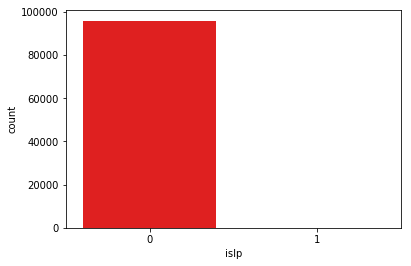

In [30]:
#bar plot to check if there is IP Address in the weblink
sns.countplot(df['isIp'],color="r")

In [32]:
#to check co relation to the target
cor=df.corr()
cor

,ranking,isIp,valid,activeDuration,urlLen,is@,isredirect,haveDash,domainLen,nosOfSubdomain,label
ranking,1.000000,0.002302,-0.271810,-0.462385,0.104733,0.022798,0.059468,0.103518,0.154659,0.105718,0.516873
isIp,0.002302,1.000000,0.004698,0.000379,-0.001197,-0.000799,-0.001312,-0.002781,0.006634,0.027164,0.012811
valid,-0.271810,0.004698,1.000000,0.812531,-0.050022,-0.023917,-0.026677,-0.128651,-0.126793,-0.174061,-0.266774
activeDuration,-0.462385,0.000379,0.812531,1.000000,-0.133796,-0.026034,-0.047993,-0.150173,-0.178393,-0.178431,-0.523114
urlLen,0.104733,-0.001197,-0.050022,-0.133796,1.000000,0.017182,-0.010021,0.370280,0.497716,0.346738,0.396519
is@,0.022798,-0.000799,-0.023917,-0.026034,0.017182,1.000000,-0.004567,0.000549,-0.002268,-0.003439,0.039777
isredirect,0.059468,-0.001312,-0.026677,-0.047993,-0.010021,-0.004567,1.000000,-0.007222,-0.015948,-0.026618,0.073247
haveDash,0.103518,-0.002781,-0.128651,-0.150173,0.370280,0.000549,-0.007222,1.000000,0.365871,0.250143,0.239623
domainLen,0.154659,0.006634,-0.126793,-0.178393,0.497716,-0.002268,-0.015948,0.365871,1.000000,0.863078,0.231828
nosOfSubdomain,0.105718,0.027164,-0.174061,-0.178431,0.346738,-0.003439,-0.026618,0.250143,0.863078,1.000000,0.113249


### valid and activeDurtion has negative ranking and thus the least co relation to the label. Thus we will ignore valid and activeDuration.

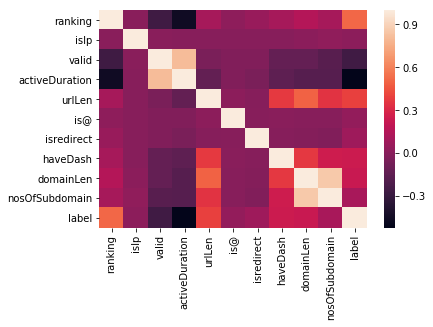

In [33]:
sns.heatmap(cor)

In [38]:
x = df.drop(['label'], axis=1)
y=df['label']

In [41]:
train_x,train_y,test_x,test_y=train_test_split(x,y,random_state=4,test_size=0.2)